<center>
<img src="../images/ods_stickers.jpg" />
    
# Introducción al Machine Learning 2020

Basado en material de Pattern Classsification Duda, Hart, Stork. Traducido y editado al español por [Ana Georgina Flesia](https://www.linkedin.com/in/georginaflesia/). Este material esta sujeto a los términos y condiciones de la licencia  [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso irrestricto para todo propósito no comercial.

In [1]:
import numpy as np
from scipy import linalg
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import warnings
warnings.filterwarnings('ignore')

# IntML2020 - Teoría Bayesiana - Estimación

# Ejercicio 1. 

Utilice el ejemplo de scikit-learn para graficar las regiones de clasificacion lineal y cuadratica para Iris usando conjuntos de dos variables. 

https://scikit-learn.org/stable/auto_examples/classification/plot_lda_qda.html#sphx-glr-auto-examples-classification-plot-lda-qda-py
    


# *Respuesta* 

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn import linear_model, datasets
import seaborn as sns
import itertools

%matplotlib inline
sns.set()

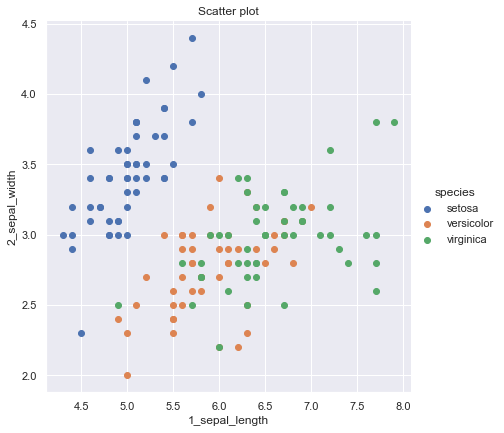

In [3]:
iris = sns.load_dataset("iris")
iris = iris.rename(index = str, columns = {'sepal_length':'1_sepal_length','sepal_width':'2_sepal_width', 'petal_length':'3_petal_length', 'petal_width':'4_petal_width'})
sns.FacetGrid(iris, hue="species", size=6) .map(plt.scatter,"1_sepal_length", "2_sepal_width", )  .add_legend()
plt.title('Scatter plot')
df1 = iris[["1_sepal_length", "2_sepal_width",'species']]

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X_data = df1.iloc[:,0:2]
y_labels = df1.iloc[:,2].replace({'setosa':0,'versicolor':1,'virginica':2}).copy()

lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X_data,y_labels)

LinearDiscriminantAnalysis(store_covariance=True)

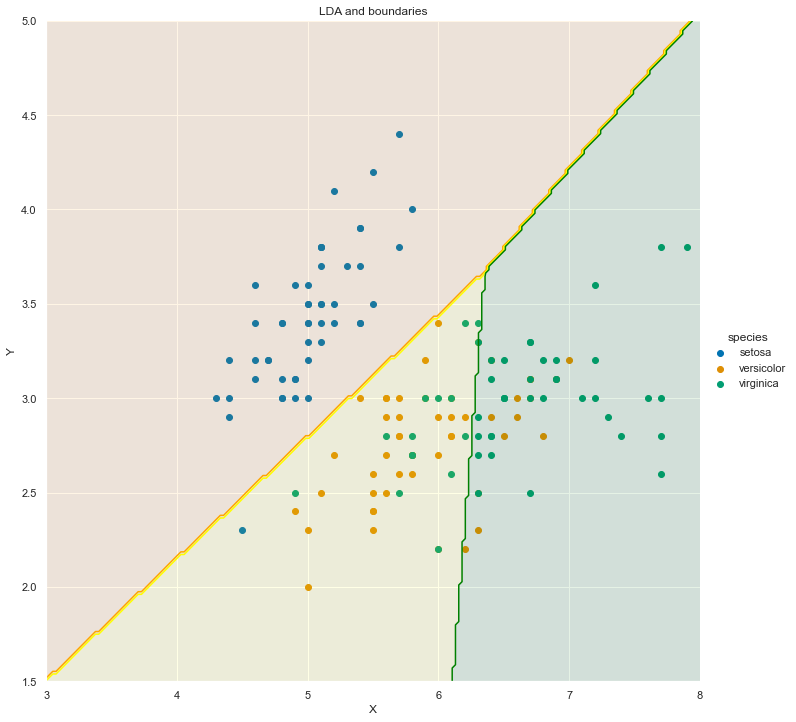

In [5]:
#Estimating the parameters
mu_list = np.split(df1.groupby('species').mean().values,[1,2])
sigma_list = np.split(df1.groupby('species').cov().values,[2,4], axis = 0)
pi_list = df1.iloc[:,2].value_counts().values / len(df1)

# Our 2-dimensional distribution will be over variables X and Y
N = 200
X = np.linspace(3, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
color_list = ['Oranges','Yellows','Browns']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(iris, hue="species", size=10, palette = 'colorblind') .map(plt.scatter, "1_sepal_length", "2_sepal_width",)  .add_legend()
my_ax = g.ax


#Computing the predicted class function for each value on the grid
zz = np.array(  [lda.predict( np.array([[xx,yy]])) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
    
#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)


#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('orange','yellow','green'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('orange','yellow','green'))

# Addd axis and title
my_ax.set_xlabel('X')
my_ax.set_ylabel('Y')
my_ax.set_title('LDA and boundaries')

plt.show()

In [6]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
X_data = df1.iloc[:,0:2]
y_labels = df1.iloc[:,2].replace({'setosa':0,'versicolor':1,'virginica':2}).copy()

qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_data,y_labels)

QuadraticDiscriminantAnalysis(store_covariance=True)

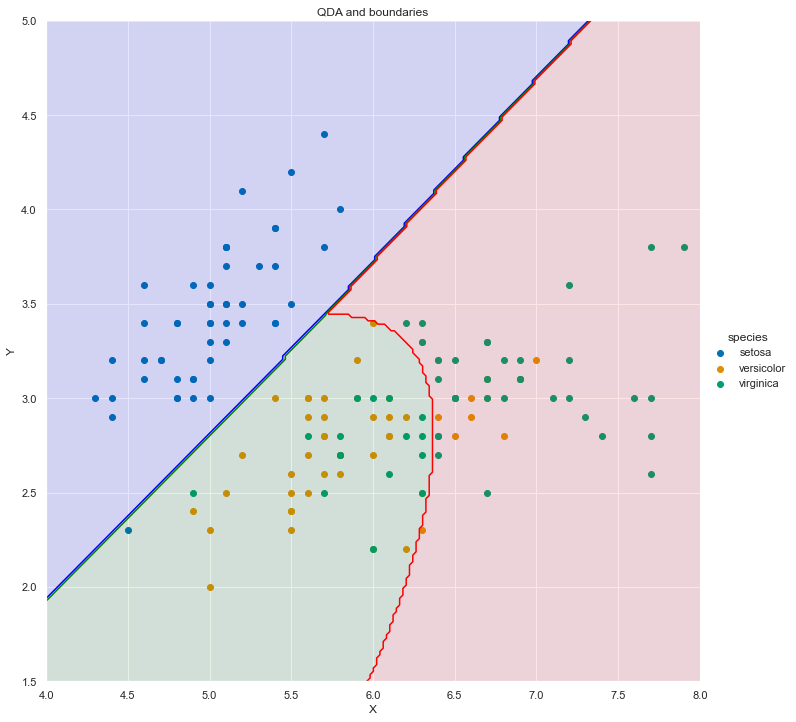

In [7]:
#Estimating the parameters
mu_list = np.split(df1.groupby('species').mean().values,[1,2])
sigma_list = np.split(df1.groupby('species').cov().values,[2,4], axis = 0)
pi_list = df1.iloc[:,2].value_counts().values / len(df1)

# Our 2-dimensional distribution will be over variables X and Y
N = 200
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(iris, hue="species", size=10, palette = 'colorblind') .map(plt.scatter, "1_sepal_length", "2_sepal_width",)  .add_legend()
my_ax = g.ax


#Computing the predicted class function for each value on the grid
zz = np.array(  [qda.predict( np.array([[xx,yy]])) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
    
#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)


#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
my_ax.set_xlabel('X')
my_ax.set_ylabel('Y')
my_ax.set_title('QDA and boundaries')

plt.show()

# Ejercicio 2. 

* [a)] Ajuste los discriminantes lineales y cuadraticos sobre Iris con las 3 poblaciones. 

* [b)] Ajuste mezcla de Gaussianas para las tres poblaciones. Use la pagina 

https://scikit-learn.org/stable/modules/mixture.html

https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm.html

https://www.kaggle.com/danielhanchen/gaussian-mixture-models-on-mnist-iris

https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html#sphx-glr-auto-examples-mixture-plot-gmm-covariances-py


* [c)] Ajuste un clasificador del tipo Naive Bayes Gaussiano. 

https://scikit-learn.org/stable/modules/naive_bayes.html

Use la pagina 
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

para armar comparaciones de todos los clasificadores anteriores. 

Diga como estima los parametros en cada caso. 

* [d]  Explique como utilizaria la curva ROC para realizar comparaciones sobre Iris con todos estos clasificadores. 

# *Respuesta* 

 <span style="color:red"> RESPONDA EL INCISO B AQUÍ </span>

 <span style="color:red"> RESPONDA EL INCISO C AQUÍ </span>

# Ejercicio 3.

Supongamos que la variable $X$ tiene distribución exponencial

$$
	p(x|\theta)=\left\{
	\begin{array}{lcr}
		 \theta e^{-\theta x} & \ &\mbox{ si }x \geq0 \\
		 \ 0 &\ &\mbox{en caso contrario}\\
	\end{array}
	\right.
$$


* [a)] Grafique $p(x|\theta)$ versus $x$ para $\theta=1$. Grafique $p(x|\theta)$ versus $\theta$, $(0 \leq \theta \leq 5)$, para $x = 2$.

* [b)] Suponga que $n$ ejemplos $x_1 , \cdots , x_n$ se generan independientemente de acuerdo a $p(x|\theta)$. Muestre que el estimador de máxima verosimilitud para $\theta$ está dado por
$$\hat{\theta}=\frac{1}{\frac{1}{n}\sum_{k=1}^{n}{x_k}}$$

* [c)] En su gráfico generado con $\theta = 1$ en la parte a), marque el estimador de máxima verosimilitud $\hat{\theta}$ para $n$ grandes.



# *Respuesta* 

 <span style="color:red"> RESPONDA EL INCISO A AQUÍ </span>

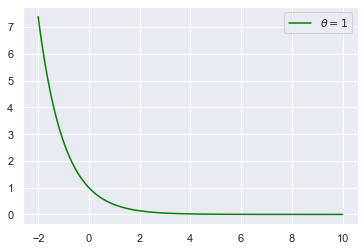

In [20]:
def p(x,theta):
    if x>=0:
        return theta*np.exp(-theta*x)
    else:
        return 0
def p_1(x):
    return p(x,1)

x = np.linspace(-2,10,1000)
plt.plot(x, np.vectorize(np.exp)(-x), color= 'green', linestyle='solid', label=r'$\theta=1$')
plt.legend()

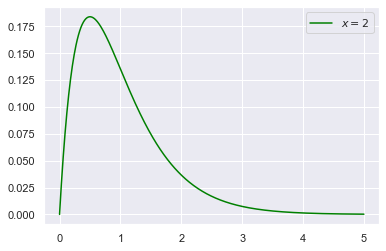

In [16]:
theta = np.linspace(0,5,500)
plt.plot(theta, np.vectorize(p)(2,theta), color= 'green', linestyle='solid', label=r'$x=2$')
plt.legend()

 <span style="color:red"> RESPONDA EL INCISO B AQUÍ </span>

 <span style="color:red"> RESPONDA EL INCISO C AQUÍ </span>

Deberia generar un número grande de muestras de una distribución correspondiente a $p(x,1)$ y graficar el estimador con las muestras que genere. No se que libreria o paquete deberia usar para generar muestras de un a distribución arbitraria o que no venga predeterminada (como si lo sería una distribución normal por ejemplo) asi que no puedo hacer el grafico que se me pide

# Ejercicio 4. 

Supongamos que la variable $X$ tiene distribución uniforme

$$
	p(x|\theta)\thicksim U(0,\theta)=\left\{
	\begin{array}{lcr}
		 {1}/{\theta} 	& \ 		&\mbox{ si }0 \leq x \leq \theta \\
		 \ 0 &\ &\mbox{en caso contrario}\\
	\end{array}
	\right.
$$

* [a)] Suponga que $n$ ejemplos $ D = \{ x_1,\ldots,x_n \} $ son generados independientemente de acuerdo a $p(x|\theta)$. Muestre que el estimador de máxima verosimilitud para $\theta$ es $max[D]$, esto es el valor del máximo elemento de $D$.
* [b)] Suponga que son generados $n=5$ puntos acorde con esta distribución y el maximo valor de esos puntos es  ${\max}_k (x_k)=0.6$. Grafique la verosimilitud $p(D|\theta)$ en el rango $0 \leq \theta \leq 1$. Explique con palabras por que no es necesario conocer los otros 4 puntos.



# *Respuesta* 

 <span style="color:red"> RESPONDA EL INCISO A AQUÍ </span>

 <span style="color:red"> RESPONDA EL INCISO B AQUÍ </span>

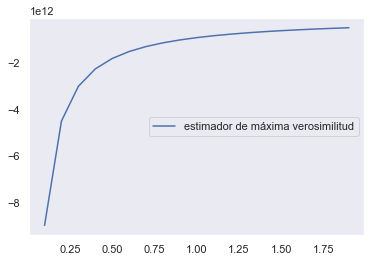

In [21]:
theta = np.arange(0, 2, 0.1)
n = np.arange(1., 1000, 1)

L= -(1./theta)*900000000000

plt.grid()

plt.plot(theta,L, 'b', label = 'estimador de máxima verosimilitud')
plt.legend(loc='right')

plt.show()


# Ejercicio 5


Considere los modelos de clasificación con densidad Gaussiana en diferentes dimensiones:

* [a)] Escriba un programa para encontrar los valores de maxima verosimilitud $\hat\mu$ y $\hat\sigma^2$. Aplique su programa individualmente para cada una de las tres caracteristica $x_i$ de la categoria $w_1$ de la Tabla que se levanta como datos.data.

* [b)] Modifique su programa para aplicarlo a datos Gaussianos bidimensionales $p(x)\sim N(\mu,\Sigma)$. Aplique su programa para cadas una de las tres formas de apareamiento de a dos caracteristicas para $w_1$.
* [c)] Modifique su programa para aplicarlo a datos Gaussianos de tres dimensiones. Aplique su programa para a las tres dimensiones de la categoria $w_1$.
* [d)] Asuma que su modelo de tres dimensiones es separable, por lo tanto $\Sigma=diag(\sigma_1^2,\sigma_2^2,\sigma_3^2)$. Escriba un programa para estimar la media y los componentes diagonales de $\Sigma$. Aplique el programa a los datos en $w_2$.
* [e)] Compare los resultados para la media de cada caracteristica $\mu_i$ calculada en las formas previas. Explique por que son iguales o diferentes.
* [f)] Compare sus resultados para la varianza de cada caracteristica $\sigma_i^2$ calculada de las formas previas. Explique por que los resultados son iguales o diferentes.


# *Respuesta* 

In [24]:
import pandas as pd

df = pd.read_csv('/home/floormolina99/Aprendizaje Automatico/data/datos.data', header=None)
df.head(14)

,0,1,2,3,4,5,6,7,8
0,w1,w1,w1,w2,w2,w2,w3,w3,w3
1,x1,x2,x3,x1,x2,x3,x1,x2,x3
2,0.42,-0.087,0.58,-0.4,0.58,0.089,0.83,1.6,-0.014
3,-0.2,-3.3,-3.4,-0.31,0.27,-0.04,1.1,1.6,0.48
4,1.3,-0.32,1.7,0.38,0.055,-0.035,-0.44,-0.41,0.32
5,0.39,0.71,0.23,-0.15,0.53,0.011,0.047,-0.45,1.4
6,-1.6,-5.3,-0.15,-0.35,0.47,0.034,0.28,0.35,3.1
7,-0.029,0.89,-4.7,0.17,0.69,0.1,-0.39,-0.48,0.11
8,-0.23,1.9,2.2,-0.011,0.55,-0.18,0.34,-0.079,0.14
9,0.27,-0.3,-0.87,-0.27,0.61,0.12,-0.3,-0.22,2.2


 <span style="color:red"> RESPONDA EL INCISO A AQUÍ </span>

In [25]:
df2= df.drop([0, 1],axis=0)
df2 = df2.astype(float)
print('Valor Medio y desviacion estandar por columna')

for i in range(9):
    for j in range(10):
            a=df2.iloc[:,i].sum()
            Mu = a/10
            sigma= ((df2.iloc[j,i]-Mu)**2)/10
    print(i,round(Mu,4),'  ',round(sigma,8))

Valor Medio y desviacion estandar por columna
0 -0.0709    0.08852928
1 -0.6047    0.01562621
2 -0.911    0.2852721
3 -0.1126    5.48e-06
4 0.4299    0.01413008
5 0.0037    0.00044516
6 0.2747    0.00089681
7 0.3001    0.0168182
8 0.6786    0.1365626


In [26]:
def Mu(i):
    for j in range(10):
            a=df2.iloc[:,i].sum()
            Mu = a/10
            if j == 10:
                 break 
    return Mu

In [27]:
def sigma(i):
    for j in range(10):
            a=df2.iloc[:,i].sum()
            Mu = a/10
            sigma= ((df2.iloc[j,i]-Mu)**2)/10
            if j == 10:
                 break 
    return sigma

 <span style="color:red"> RESPONDA EL INCISO B AQUÍ </span>

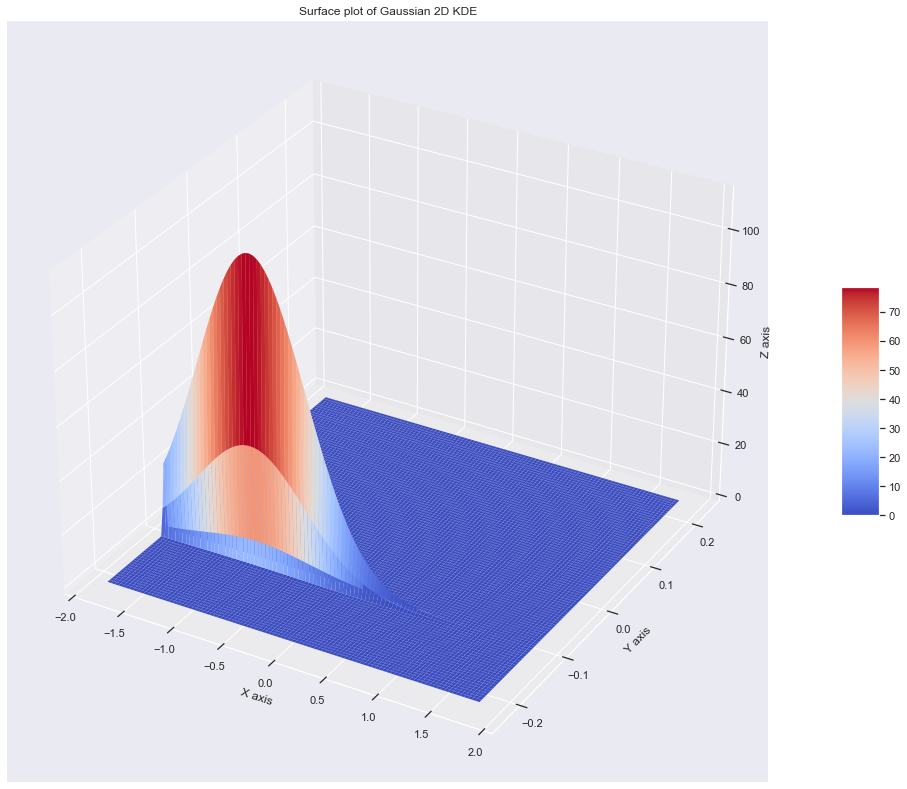

In [28]:
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

size = 100


sigma_x = sigma(2)
sigma_y = sigma(3)
Mu_x = Mu(2)
Mu_y = Mu(3)

x = np.linspace(-Mu_x*2, Mu_x*2, size)
y = np.linspace(-Mu_y*2, Mu_y*2, size)

X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([Mu_x, Mu_y], [[sigma_x, 0], [0, sigma_y]])

#Make a 3D plot
fig = plt.figure(figsize=(26, 14))
ax = fig.gca(projection='3d')
a=ax.plot_surface(X, Y, rv.pdf(pos),rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Surface plot of Gaussian 2D KDE')
fig.colorbar(a, shrink=0.3, aspect=6) # add color bar indicating the PDF
#ax.view_init(30, 25)
plt.show()

 <span style="color:red"> RESPONDA EL INCISO C AQUÍ </span>

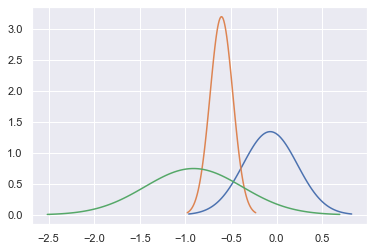

In [29]:
import scipy.stats as stats
import math

Mu2 = Mu(1)
sigma2 = math.sqrt(sigma(1))

Mu1 = Mu(0)
sigma1 = math.sqrt(sigma(0))

Mu3 = Mu(2)
sigma3 = math.sqrt(sigma(2))

x1 = np.linspace(Mu1 - 3*sigma1, Mu1 + 3*sigma1, 100)
x2 = np.linspace(Mu2 - 3*sigma2, Mu2 + 3*sigma2, 100)
x3 = np.linspace(Mu3 - 3*sigma3, Mu3 + 3*sigma3, 100)
plt.plot(x1, stats.norm.pdf(x1, Mu1, sigma1))
plt.plot(x2, stats.norm.pdf(x2, Mu2, sigma2))
plt.plot(x3, stats.norm.pdf(x3, Mu3, sigma3))
plt.show()

 <span style="color:red"> RESPONDA EL INCISO D AQUÍ </span>

In [30]:
C= np.array([[sigma(5),0,0],[0,sigma(4),0],[0,0,sigma(3)]])

w2_1=Mu(3)
w2_2=Mu(4)
w2_3=Mu(5)

print(w2_1,w2_2,w2_3)
C

-0.11259999999999999 0.42990000000000006 0.003720000000000001


array([[4.4515584e-04, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.4130081e-02, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 5.4760000e-06]])

 <span style="color:red"> RESPONDA EL INCISO E AQUÍ </span>

In [31]:
for i in range(9):
    for j in range(10):
            a=df2.iloc[:,i].sum()
            Mu = a/10
            sigma= ((df2.iloc[j,i]-Mu)**2)/10
    print(i,round(Mu,4),'  ',round(sigma,8))

0 -0.0709    0.08852928
1 -0.6047    0.01562621
2 -0.911    0.2852721
3 -0.1126    5.48e-06
4 0.4299    0.01413008
5 0.0037    0.00044516
6 0.2747    0.00089681
7 0.3001    0.0168182
8 0.6786    0.1365626


 <span style="color:red"> RESPONDA EL INCISO F AQUÍ </span>

In [4]:
import pandas as pd

df = pd.read_csv('datos.data', header=None)
df.head()
print(df)

         0       1      2       3      4       5      6       7       8
0       w1      w1     w1      w2     w2      w2     w3      w3      w3
1       x1      x2     x3      x1     x2      x3     x1      x2      x3
2     0.42  -0.087   0.58    -0.4   0.58   0.089   0.83     1.6  -0.014
3     -0.2    -3.3   -3.4   -0.31   0.27   -0.04    1.1     1.6    0.48
4      1.3   -0.32    1.7    0.38  0.055  -0.035  -0.44   -0.41    0.32
5     0.39    0.71   0.23   -0.15   0.53   0.011  0.047   -0.45     1.4
6     -1.6    -5.3  -0.15   -0.35   0.47   0.034   0.28    0.35     3.1
7   -0.029    0.89   -4.7    0.17   0.69     0.1  -0.39   -0.48    0.11
8    -0.23     1.9    2.2  -0.011   0.55   -0.18   0.34  -0.079    0.14
9     0.27    -0.3  -0.87   -0.27   0.61    0.12   -0.3   -0.22     2.2
10    -1.9    0.76   -2.1  -0.065   0.49  0.0012    1.1     1.2   -0.46
11    0.87    -1.0   -2.6   -0.12  0.054  -0.063   0.18   -0.11   -0.49


# Ejercicio 6 

Considere la estimación Bayesiana de la media de una distribucion Gaussiana unidimensional. Suponga una distribución a priori $p(\mu)\sim N(\mu_0,\sigma_0)$

* [a)] Calcule con todos los pasos $p(\mu|D)$ y $p(x|D)$ en el caso Gaussiano unidimensional donde $\mu$ es desconocida, determinando cual es la densidad reproductora y cual es el prior conjugado. Diga cual es el dogmatismo, es decir, el balance entre el conocimiento previo y el conocimiento emprírico proveniente de los datos. Obtenga esta información del libro. Tiene a su disposición una versión .djvu completa y pdf del capitulo 3. 

* [b)] Escriba un programa que dibuje la densidad $p(x|D)$ dado $\mu_0, \sigma_0,\sigma$ y la muestra de entrenamiento $D=\{x_1,\cdots, x_n\}$, 

* [c)] Estime $\sigma$ para la componente $x_2$ de la muestra $\omega_3$ de la tabla anterior. Suponga que $\mu_0=-1$, grafique $p(x|D)$ para cada uno de los siguientes dogmatismos $\sigma^2/\sigma_0^2= 0.1,1,10,100$. 

 # *Respuesta*   <font color = 'RED'> estudiar esta respuesta </font>


* [a)] Consideramos la estimación bayesiana de la media de una distribución Gaussiana unidimensional, donde la distribución a priori de esta media es también gaussiana: $p(\mu) \sim N(\mu_0, \sigma_0)$.

Dada una muestra $\mathcal D = \{x_1, x_2, \dots, x_n\}$, tenemos entonces que
$$p(x_i | \mu) = \frac 1{\sqrt{2\pi}\sigma} e^{-\frac{(x_i-\mu)^2}{2\sigma^2}}, \qquad \sigma \mbox{ conocida}.$$

La estimación a posteriori de $\mu$ dada la muestra $\mathcal D$ está dada por 
$$p(\mu|\mathcal D) = \frac{p(\mathcal D | \mu) p(\mu)} { \int p(\mathcal D | \mu)p(\mu) d\mu}.$$

Denotamos $\alpha = p(\mathcal D)^{-1}$, esto es:
$$\alpha = \frac 1{ \int p(\mathcal D | \mu)p(\mu) d\mu}.$$
Por otra parte, como la muestra $\mathcal D$ es de observaciones independientes su probabilidad es el producto de las probabilidades individuales. Así resulta:
$$p(\mu|\mathcal D) =\alpha \, p(\mathcal D | \mu) p(\mu) = \alpha \left( \prod_{i=1}^n p(x_i | mu)\right) \cdot p(\mu).$$

Luego,
\begin{eqnarray}
p(\mu|\mathcal D)  &=& \alpha \left(  \prod_{i=1}^n \frac 1{\sqrt{2\pi}\sigma} e^{-\frac{(x_i-\mu)^2}{2\sigma^2}}
\right)\, \frac 1{\sqrt{2\pi}\sigma_0} e^{-\frac{(\mu-\mu_0)^2}{2\sigma_0^2}} = \frac{\alpha}{(2\pi)^{(n+1)/2}\sigma\sigma_0} \left(  \prod_{i=1}^n e^{-\frac{(x_i-\mu)^2}{2\sigma^2}}
\right)\, e^{-\frac{(\mu-\mu_0)^2}{2\sigma_0^2}}
\end{eqnarray}
Sumamos los exponentes en las $(n+1)$ exponenciales y resulta:

\begin{eqnarray}
-\left(\sum_{i=1}^n \frac{(x_i-\mu)^2}{2\sigma^2} \right)-\frac{(\mu-\mu_0)^2}{2\sigma_0^2} &=& -\frac 12
\left(\sum_{i=1}^n \frac{(x_i-\mu)^2}{\sigma^2} \right)+\frac{(\mu-\mu_0)^2}{\sigma_0^2}  
\\
&=&
-\frac 12 \left( \sum_{i=1}^n \frac {x_i^2}{\sigma^2} - 2 \sum_{i=1}^n \frac{x_i \mu}{\sigma^2} + n \frac{\mu^2}{\sigma^2} + \frac{\mu^2}{\sigma_0^2} - 2\frac{\mu_0\mu}{\sigma_0^2} + \frac{\mu_0^2}{\sigma_0^2}\right)
\\
&=&
-\frac 12 \left( \sum_{i=1}^n \frac {x_i^2}{\sigma^2} + \frac{\mu_0^2}{\sigma_0^2}\right) - \frac 12 
\left( \left( \frac n{\sigma^2} + \frac 1{\sigma_0^2} \right) \mu^2 - 2 \left(   \sum_{i=1}^n \frac{x_i \mu}{\sigma^2} + \frac{\mu_0}{\sigma_0^2}\right) \mu \right) \\
&=&
A + B + C
\end{eqnarray}
El término $A$ no depende de $\mu$ por lo que $e^A$ lo agrupamos con $\alpha$.

Los términos $B$ y $C$ pueden completarse para formar el cuadrado de un binomio:
$$ \left( \frac n{\sigma^2} + \frac 1{\sigma_0^2} \right) \mu^2 - 2 \left(   \sum_{i=1}^n \frac{x_i}{\sigma^2} + \frac{\mu_0}{\sigma_0^2}\right) \mu  = 
a \mu^2 - 2b \mu = a \left( \mu^2 -2\frac ba \mu + \left(\frac ba\right)^2 -  \left(\frac ba\right)^2\right) 
= \frac{ (\mu - \frac ba)^2}{1/a} - \frac{b^2}a
$$
donde
$$a = \frac n{\sigma^2} + \frac 1{\sigma_0^2}, \qquad b =  \sum_{i=1}^n \frac{x_i}{\sigma^2} + \frac{\mu_0}{\sigma_0^2} = \frac n{\sigma^2} \,\overline x  + \frac{\mu_0}{\sigma_0^2}. \qquad \overline x = \frac 1n \sum_{i=1}^n x_i.$$

Así resulta que la densidad reproductura $p(\mu|\mathcal D)$ es una densidad normal con media:
$$\mu_n = \frac ba = \frac {\frac n{\sigma^2} \,\overline {x_n}  + \frac{\mu_0}{\sigma_0^2}}{\frac n{\sigma^2} + \frac 1{\sigma_0^2}} = \frac{n \overline {x_n} \sigma_0^2 + \mu_0\sigma^2}{n\sigma_0^2 + \sigma^2}$$
 y varianza
 $$ \sigma_n = \frac{n\sigma_0^2 + \sigma^2}{\sigma^2 \sigma_0^2},$$
 siendo $\overline{x_n}$ la media muestral de los $n$ datos observados.
 
 ### Cálculo de $p(x|\mathcal D)$
 
\begin{eqnarray}
p(x | \mathcal D) &=& \int p(x |\mu)p(\mu|\mathcal D) d\mu \\
&=&\int \frac 1{\sqrt{2\pi}\sigma} e^{-\frac{(x-\mu)^2}{2\sigma^2}}\,\frac 1{\sqrt{2\pi}\sigma_n} e^{-\frac{(\mu-\mu_n)^2}{2\sigma_n^2}}\,d\mu \\
&=&
{}\frac 1{2\pi\sigma\sigma_n}\int \exp\left(
-\frac{(x-\mu)^2}{2\sigma^2}-\frac{(\mu-\mu_n)^2}{2\sigma_n^2}\right)\, d\mu \\
&=&
{}\frac 1{2\pi\sigma\sigma_n}\int \exp\left(
-\frac{\sigma_n^2(x^2-2\mu x + \mu^2)}{2\sigma^2\sigma_n^2}
-\frac{\sigma^2(\mu^2-2\mu\mu_n+\mu_n^2)}{2\sigma_n^2\sigma^2}\right)\, d\mu \\
&=&
{}\frac 1{2\pi\sigma\sigma_n}\int \exp\left(
-\frac{(\sigma_n^2+ \sigma^2)\mu^2 - 2\mu (x\sigma_n^2  +\sigma^2\mu_n) + \sigma_n^2x^2 + \sigma^2\mu_n^2}{2\sigma_n^2\sigma^2}\right)\, d\mu \\
&=&
\frac 1{2\pi\sigma\sigma_n}
\int \exp\left(- \frac{(\mu - \frac{x\sigma_n^2  +\sigma^2\mu_n}{\sigma_n^2 + \sigma^2})^2}{\frac{2\sigma_n^2\sigma^2}{\sigma_n^2 + \sigma^2}} \right)d\mu \exp\left(
\frac{x^2 \sigma^2 + \sigma_n^2\mu_n^2 - \frac{(x\sigma^2 + \mu_n\sigma_n^2)^2}{\sigma^2 + \sigma_n^2}}{\sigma^2\sigma_n^2}
\right)
\end{eqnarray}

La integral respecto de $\mu$ es proporcional a la integral de la densidad de una normal, con media y desvío estándar dado por:
$$\mu_1 = \frac{x\sigma_n^2  +\sigma^2\mu_n}{\sigma_n^2 + \sigma^2} \qquad 
\sigma_1 =\frac{2\sigma_n^2\sigma^2}{\sigma_n^2 + \sigma^2}. $$
Por lo tanto es igual a $\sqrt{2\pi}\sigma_1$, que es independiente del valor de $x$:

Resolvemos el otro factor observando que:
\begin{eqnarray}
x^2 \sigma^2 + \sigma_n^2\mu_n^2 - \frac{(x\sigma^2 + \mu_n\sigma_n^2)^2}{\sigma^2 + \sigma_n^2}
&=& \frac{1}{\sigma^2 + \sigma_n^2} \left( x^2 \sigma^4 + x^2 \sigma^2 \sigma_n^2 + \sigma^2 \sigma_n^2 \mu_n^2 + \sigma_n ^4 \mu_n ^2 - x^2\sigma^4 - \mu_n^2 \sigma_n^4 - 2x\sigma^2 \mu_n \sigma_n^2\right)\\
&=&
\frac{\sigma^2 \sigma_n^2}{\sigma^2 + \sigma_n^2} \left(x^2 - 2x \mu_n + \mu_n^2\right) = \frac{\sigma^2 \sigma_n^2}{\sigma^2 + \sigma_n^2}(x-\mu_n)^2.
\end{eqnarray}

Juntando resultados concluimos que $p(x|\mathcal D)$ tiene distribución normal con media y desvío estándar dados por:
$$\mu_x = \mu_n, \qquad \sigma^2_x = \sigma^2 + \sigma_n^2$$
 
 ### Dogmatismo
 $$\frac{\sigma^2}{\sigma_0^2}$$
 





 <span style="color:red"> RESPONDA EL INCISO B AQUÍ </span>

 <span style="color:red"> RESPONDA EL INCISO C AQUÍ </span>

# Ejercicio 7

Considerar las tasas de error en diferentes dimensiones

* [a)] Use maxima verosimilitud para entrenar un dicotomizador Gaussiano usando los datos tridimensionales de las categorias $w_1$ y $w_2$ en la Tabla. Integre numéricamente para estimar la proporcion del error.
* [b)] Ahora considere los datos proyectados en un subespacio bidimensional. Para cada uno de los tres subespacios - definidos por $x_1=0$, $x_2=0$ o $x_3=0$- entrene un dicotomizador Gaussiano. Integre numericamente para estimar la proporcion del error.
* [c)] Ahora considere los datos proyectados en subespacios unidimensionales, definidos por cada uno de los tres ejes. Entrene un clasificador Gaussiano e integre numericamente para estimar la proporcion del error.
* [d)] Discuta el orden del rango de las tasas de error encontrado.
* [e)] Asumiendo que reestima la distribucion en las diferentes dimensiones, es el error de Bayes  mayor en los espacios proyectados?


# *Respuesta* 

 <span style="color:red"> RESPONDA EL INCISO A AQUÍ </span>

 <span style="color:red"> RESPONDA EL INCISO B AQUÍ </span>

 <span style="color:red"> RESPONDA EL INCISO C AQUÍ </span>

 <span style="color:red"> RESPONDA EL INCISO D AQUÍ </span>

 <span style="color:red"> RESPONDA EL INCISO E AQUÍ </span>